In [2]:
using CSV, DataFrames, Statistics

# For Synthetic-Data Experiments

In [5]:
for directory = "nonlinear/".*["fakey_mar/", "fakey_nmar/", "fakey_mar_adv/"]
    subdir="all/"
    filelist = [f for f in readdir(directory*subdir) if endswith(f, ".csv") && f ∉ ["all_results.csv","all_results_new.csv"]]
    res = similar(CSV.read(directory*subdir*filelist[1], DataFrame),0)
    for i in 1:length(filelist)
        res = vcat(res, CSV.read(directory*subdir*filelist[i], DataFrame))
    end
    # filter!(t -> t[:k] > 0, res) #Remove dataset with only a bias term
    res[!,:method_cat] = map(t -> startswith(t, "Imp-then-Reg") ? "Imp-then-Reg" : t, res[:,:method])
    
    CSV.write(directory*"FINAL_results.csv", res)
end

In [3]:
for directory = "linear/".*["fakey_mar/", "fakey_nmar/", "fakey_mar_adv/"]
    res = CSV.read(directory*"FINAL_results.csv", DataFrame)
    filter!(t -> t[:method] != "Finite", res)
    try 
        select!(res, Not(:method_cat))
    catch 
        ()
    end

    subdir="finite/"
    filelist = [f for f in readdir(directory*subdir) if endswith(f, ".csv") && f ∉ ["all_results.csv","all_results_new.csv"]]
    for i in 1:length(filelist)
        res = vcat(res, 
                    filter(t -> t[:method] == "Finite", CSV.read(directory*subdir*filelist[i], DataFrame))
                    )
    end

    res[!,:method_cat] = map(t -> startswith(t, "Imp-then-Reg") ? "Imp-then-Reg" : t, res[:,:method])

    CSV.write(directory*"FINAL_results.csv", res)
end

LoadError: ArgumentError: "linear/fakey_mar/fakey_mar/FINAL_results.csv" is not a valid file

In [11]:
CSV.write(directory*"FINAL_results.csv", res)

"linear/fakey_mar/FINAL_results.csv"

# For Synthetic-Data Experiments

#### Note from Jean: 
For synthetic data, the main experiments were performed with *affine_on_static_only* set to true. By default, it should be set to false. So, 
- Saving the results with *true* seperately
- Merging the results wih *false* for the main analysis

In [30]:
# directory = "nmar_outliers/"
# directory = "fakey_nmar/"
directory = "fakey/"

"fakey/"

In [31]:
subdir="revisions/"
filelist = [f for f in readdir(directory*subdir) if endswith(f, ".csv") && f ∉ ["all_results.csv","all_results_new.csv"]]
res = similar(CSV.read(directory*subdir*filelist[1], DataFrame),0)
for i in 1:length(filelist)
    res = vcat(res, CSV.read(directory*subdir*filelist[i], DataFrame))
end
# filter!(t -> t[:k] > 0, res) #Remove dataset with only a bias term
res[!,:method_cat] = map(t -> startswith(t, "Imp-then-Reg") ? "Imp-then-Reg" : t, res[:,:method]);

In [32]:
CSV.write(directory*"exploration_results_affineOnStatic.csv", res)

"fakey/exploration_results_affineOnStatic.csv"

In [33]:
unique(res[:,:method])

11-element Vector{String}:
 "Oracle X"
 "Oracle XM"
 "Complete Features"
 "Imp-then-Reg 1"
 "Imp-then-Reg 2"
 "Imp-then-Reg 3"
 "Imp-then-Reg 4"
 "Imp-then-Reg 5"
 "Static"
 "Affine"
 "Finite"

In [34]:
subdir="not_affine_on_static/"
filelist = [f for f in readdir(directory*subdir) if endswith(f, ".csv") && f ∉ ["all_results.csv","all_results_new.csv"]]
aux = similar(CSV.read(directory*subdir*filelist[1], DataFrame),0)
for i in 1:length(filelist)
    aux = vcat(aux, CSV.read(directory*subdir*filelist[i], DataFrame))
end
# filter!(t -> t[:k] > 0, res) #Remove dataset with only a bias term
aux[!,:method_cat] = map(t -> startswith(t, "Imp-then-Reg") ? "Imp-then-Reg" : t, aux[:,:method]);

In [35]:
unique(aux[:,:method])

2-element Vector{String}:
 "Static"
 "Affine"

In [36]:
filter!(t -> t[:method] ∉ unique(aux[:,:method]), res)

,dataset,SNR,k,kMissing,splitnum,method,r2,osr2
,String,Int64,Int64,Int64,Int64,String,Float64,Float64
1,COUNT-loomis,2,10,0,1,Oracle X,0.772824,0.791235
2,COUNT-loomis,2,10,0,1,Oracle XM,0.772372,0.790914
3,COUNT-loomis,2,10,0,1,Complete Features,0.772038,0.791102
4,COUNT-loomis,2,10,0,1,Imp-then-Reg 1,0.772079,0.791239
5,COUNT-loomis,2,10,0,1,Imp-then-Reg 2,0.772126,0.791492
6,COUNT-loomis,2,10,0,1,Imp-then-Reg 3,0.772803,0.791717
7,COUNT-loomis,2,10,0,1,Imp-then-Reg 4,0.7727,0.791152
8,COUNT-loomis,2,10,0,1,Imp-then-Reg 5,0.74095,0.683159
9,COUNT-loomis,2,10,0,1,Finite,0.773143,0.79137


In [37]:
CSV.write(directory*"FINAL_results.csv", vcat(res, aux))

"fakey/FINAL_results.csv"

# For Real-Data Experiments

#### Note from Jean: 
For real data, the main experiments were performed with *affine_on_static_only* set to false (the opposite from synthetic data). By default, it should be set to false. So, 
- Saving the results with *false* 
- Merging the results wih *true* and saving them seperately for our records

However, explored multiple regularization. Keeping missing_weight in the main. Saving the rest for our records

In [38]:
directory = "realy/"

"realy/"

In [39]:
subdir="revisions/"
filelist = [f for f in readdir(directory*subdir) if endswith(f, ".csv") && f ∉ ["all_results.csv","all_results_new.csv"]]
res = similar(CSV.read(directory*subdir*filelist[1], DataFrame),0)
for i in 1:length(filelist)
    res = vcat(res, CSV.read(directory*subdir*filelist[i], DataFrame))
end
# filter!(t -> t[:k] > 0, res) #Remove dataset with only a bias term
res[!,:method_cat] = map(t -> startswith(t, "Imp-then-Reg") ? "Imp-then-Reg" : t, res[:,:method]);

##### Main results

In [44]:
mainres = deepcopy(res)
keeplist = ["Complete Features", 
    "Imp-then-Reg 1", "Imp-then-Reg 2", "Imp-then-Reg 3", "Imp-then-Reg 4", "Imp-then-Reg 5", 
    "Finite"]
filter!(t -> t[:method] ∈ keeplist || endswith( t[:method], "missing_weight"), mainres)
mainres[!,:method]  .= map(t -> endswith(t, "missing_weight") ? split(t, " - ")[1] : t, mainres[:,:method])
mainres

,dataset,splitnum,method,r2,osr2,time,method_cat
,String,Int64,Abstract…,Float64,Float64,Float64,String
1,COUNT-loomis,1,Complete Features,0.255156,0.158912,7.71197,Complete Features
2,COUNT-loomis,1,Imp-then-Reg 1,0.256852,0.153234,1.35971,Imp-then-Reg
3,COUNT-loomis,1,Imp-then-Reg 2,0.256085,0.156975,0.43113,Imp-then-Reg
4,COUNT-loomis,1,Imp-then-Reg 3,0.256906,0.153316,0.0477612,Imp-then-Reg
5,COUNT-loomis,1,Imp-then-Reg 4,0.257156,0.151797,1.03045,Imp-then-Reg
6,COUNT-loomis,1,Imp-then-Reg 5,0.256108,0.150567,1.46873,Imp-then-Reg
7,COUNT-loomis,1,Static,0.252383,0.161108,0.2233,Static - missing_weight
8,COUNT-loomis,1,Affine,0.255104,0.159404,0.114214,Affine - missing_weight
9,COUNT-loomis,1,Finite,0.256877,0.152778,2.44484,Finite


In [45]:
CSV.write(directory*"FINAL_results.csv", mainres)

"realy/FINAL_results.csv"

##### Results with other regularization

In [46]:
regres = deepcopy(res)
keeplist = ["Complete Features", 
    "Imp-then-Reg 1", "Imp-then-Reg 2", "Imp-then-Reg 3", "Imp-then-Reg 4", "Imp-then-Reg 5", 
    "Finite"]
filter!(t -> t[:method] ∉ keeplist && !endswith( t[:method], "missing_weight"), regres)
regres

,dataset,splitnum,method,r2,osr2,time,method_cat
,String,Int64,String,Float64,Float64,Float64,String
1,COUNT-loomis,1,Static - lasso,0.256475,0.154882,0.583108,Static - lasso
2,COUNT-loomis,1,Affine - lasso,0.256906,0.153316,0.575273,Affine - lasso
3,COUNT-loomis,1,Static - genlasso,0.255508,0.159755,8.90162,Static - genlasso
4,COUNT-loomis,1,Affine - genlasso,0.255508,0.159755,4.09837,Affine - genlasso
5,COUNT-loomis,10,Static - lasso,0.209669,0.178015,0.135899,Static - lasso
6,COUNT-loomis,10,Affine - lasso,0.211535,0.18661,0.110936,Affine - lasso
7,COUNT-loomis,10,Static - genlasso,0.215418,0.201293,4.17239,Static - genlasso
8,COUNT-loomis,10,Affine - genlasso,0.215418,0.201293,3.77165,Affine - genlasso
9,COUNT-loomis,2,Static - lasso,0.187966,0.415164,0.126892,Static - lasso


In [47]:
CSV.write(directory*"Exploration_results_regularization.csv", mainres)

"realy/Exploration_results_regularization.csv"

##### Results with affine_on_static_only

In [49]:
subdir="affine_on_static/"
filelist = [f for f in readdir(directory*subdir) if endswith(f, ".csv") && f ∉ ["all_results.csv","all_results_new.csv"]]
aux = similar(CSV.read(directory*subdir*filelist[1], DataFrame),0)
for i in 1:length(filelist)
    aux = vcat(aux, CSV.read(directory*subdir*filelist[i], DataFrame))
end
# filter!(t -> t[:k] > 0, res) #Remove dataset with only a bias term
aux[!,:method_cat] = map(t -> startswith(t, "Imp-then-Reg") ? "Imp-then-Reg" : t, aux[:,:method])
aux

,dataset,splitnum,method,r2,osr2,time,method_cat
,String,Int64,String,Float64,Float64,Float64,String
1,COUNT-loomis,1,Static - lasso,0.254337,0.158927,8.85775,Static - lasso
2,COUNT-loomis,1,Affine - lasso,0.256197,0.155097,0.571366,Affine - lasso
3,COUNT-loomis,1,Static - genlasso,0.255508,0.159755,11.5765,Static - genlasso
4,COUNT-loomis,1,Affine - genlasso,0.255508,0.159755,4.48575,Affine - genlasso
5,COUNT-loomis,1,Static - missing_weight,0.25579,0.15801,0.400817,Static - missing_weight
6,COUNT-loomis,1,Affine - missing_weight,0.255104,0.159404,0.156193,Affine - missing_weight
7,COUNT-loomis,10,Static - lasso,0.210727,0.187531,0.182412,Static - lasso
8,COUNT-loomis,10,Affine - lasso,0.215708,0.201078,0.160249,Affine - lasso
9,COUNT-loomis,10,Static - genlasso,0.215418,0.201293,5.71172,Static - genlasso


In [50]:
filter!(t -> t[:method] ∉ unique(aux[:,:method]), res)

,dataset,splitnum,method,r2,osr2,time,method_cat
,String,Int64,String,Float64,Float64,Float64,String
1,COUNT-loomis,1,Complete Features,0.255156,0.158912,7.71197,Complete Features
2,COUNT-loomis,1,Imp-then-Reg 1,0.256852,0.153234,1.35971,Imp-then-Reg
3,COUNT-loomis,1,Imp-then-Reg 2,0.256085,0.156975,0.43113,Imp-then-Reg
4,COUNT-loomis,1,Imp-then-Reg 3,0.256906,0.153316,0.0477612,Imp-then-Reg
5,COUNT-loomis,1,Imp-then-Reg 4,0.257156,0.151797,1.03045,Imp-then-Reg
6,COUNT-loomis,1,Imp-then-Reg 5,0.256108,0.150567,1.46873,Imp-then-Reg
7,COUNT-loomis,1,Finite,0.256877,0.152778,2.44484,Finite
8,COUNT-loomis,10,Complete Features,0.214379,0.195325,0.0213511,Complete Features
9,COUNT-loomis,10,Imp-then-Reg 1,0.212212,0.188192,0.0260761,Imp-then-Reg


In [51]:
CSV.write(directory*"exploration_results_affineOnStatic.csv", vcat(res, aux))

"realy/exploration_results_affineOnStatic.csv"

In [4]:
finiteres = filter(t -> t[:method_cat] ∈ ["Finite"], res)
CSV.write(directory*"all_results_finite.csv", finiteres)

"realy/all_results_finite.csv"

In [5]:
finiteres[finiteres[:,:r2] .< 0,:]

,dataset,splitnum,method,r2,osr2,time,method_cat
,String,Int64,String,Float64,Float64,Float64,String


In [6]:
aux = filter(t -> startswith(t[:method_cat],"Affine") || startswith(t[:method_cat],"Static"), res)
aux[!,:penalty] = map(t -> split(t," - ")[2], aux[:,:method]) 
aux[!,:method] .= map(t -> split(t," - ")[1], aux[:,:method])
aux[!,:method_cat] = map(t -> startswith(t, "Imp-then-Reg") ? "Imp-then-Reg" : t, aux[:,:method]);
CSV.write(directory*"all_results_penalty.csv", aux)

"realy/all_results_penalty.csv"

In [7]:
directory = "realy/"
subdir="affine_on_static/"
filelist = [f for f in readdir(directory*subdir) if endswith(f, ".csv") && f ∉ ["all_results.csv","all_results_new.csv"]]
res = similar(CSV.read(directory*subdir*filelist[1], DataFrame),0)
for i in 1:length(filelist)
    res = vcat(res, CSV.read(directory*subdir*filelist[i], DataFrame))
end
res[!,:penalty] = map(t -> split(t," - ")[2], res[:,:method]) 
res[!,:method] .= map(t -> split(t," - ")[1], res[:,:method])
res[!,:method_cat] = map(t -> startswith(t, "Imp-then-Reg") ? "Imp-then-Reg" : t, res[:,:method]);

CSV.write(directory*"all_results_penalty2.csv", res)

"realy/all_results_penalty2.csv"

In [16]:
res[!,:penalty] = map(t -> split(t," - ")[2], res[:,:method]) 
res[!,:method] .= map(t -> split(t," - ")[1], res[:,:method])
res[!,:method_cat] = map(t -> startswith(t, "Imp-then-Reg") ? "Imp-then-Reg" : t, res[:,:method]);

In [ ]:
directory = "realy/"
subdir="fix/"
filelist = [f for f in readdir(directory*subdir) if endswith(f, ".csv") && f ∉ ["all_results.csv","all_results_new.csv"]]
res = similar(CSV.read(directory*subdir*filelist[1], DataFrame),0)
for i in 1:length(filelist)
    res = vcat(res, CSV.read(directory*subdir*filelist[i], DataFrame))
end
res[!,:method_cat] = map(t -> startswith(t, "Imp-then-Reg") ? "Imp-then-Reg" : t, res[:,:method]);

filter!( t -> endswith(t[:method], " - lasso") || endswith(t[:method], " - genlasso"), res)
lassores[!,:method] .= map(t -> replace(t, " - lasso" => ""), lassores[:,:method])

genlassores = filter( t -> endswith(t[:method], " - genlasso"), res)
genlassores[!,:method] .= map(t -> replace(t, " - genlasso" => ""), genlassores[:,:method])


            
            # CSV.write(directory*"all_results_finite.csv", res)

In [ ]:
CSV.write(directory*"all_results_rev.csv", vcat(baselineres,lassores))
CSV.write(directory*"all_results_rev.csv", vcat(baselineres,lassores))




In [34]:
subdir="adaptive/"
filelist = [f for f in readdir(directory*subdir) if endswith(f, ".csv") && f ∉ ["all_results.csv","all_results_new.csv"]]
for i in 1:length(filelist)
    aux = DataFrame(CSV.read(directory*subdir*filelist[i]))
    filter!( t -> t[:method] ∈ ["Static","Affine","Finite"], aux)
    res = vcat(res, aux)
end
filter!(t -> t[:k] > 0, res) #Remove dataset with only a bias term

,dataset,SNR,k,kMissing,splitnum,method,r2,osr2
,String,Int64,Int64,Int64,Int64,String,Float64,Float64
1,COUNT-loomis,2,10,0,1,Oracle,0.775187,0.857573
2,COUNT-loomis,2,10,0,1,Oracle XM,0.775151,0.857692
3,COUNT-loomis,2,10,0,1,Complete Features,0.774568,0.856592
4,COUNT-loomis,2,10,0,1,Imp-then-Reg 1,0.775187,0.857573
5,COUNT-loomis,2,10,0,1,Imp-then-Reg 2,0.775321,0.857918
6,COUNT-loomis,2,10,0,1,Imp-then-Reg 3,0.775414,0.858172
7,COUNT-loomis,2,10,0,1,Imp-then-Reg 4,0.774886,0.85719
8,COUNT-loomis,2,10,0,1,Imp-then-Reg 5,0.732063,0.748413
9,COUNT-loomis,2,10,0,10,Oracle,0.798351,0.823586


In [4]:
res[!,:method_cat] = map(t -> startswith(t, "Imp-then-Reg") ? "Imp-then-Reg" : t, res[:,:method]);
# res[!,:pMissing] = res[:,:kMissing] ./ res[:,:k];

LoadError: [91mArgumentError: column name :kMissing not found in the data frame[39m

In [ ]:
CSV.write(directory*"all_results_rev.csv", res)

In [15]:
baselineres = filter(t -> t[:method_cat] ∈ ["Complete Features", "Imp-then-Reg"], res)

,dataset,splitnum,method,r2,osr2,time,method_cat
,String,Int64,String,Float64,Float64,Float64,String
1,COUNT-loomis,1,Complete Features,0.255156,0.158912,8.18456,Complete Features
2,COUNT-loomis,1,Imp-then-Reg 1,0.256852,0.153234,1.49679,Imp-then-Reg
3,COUNT-loomis,1,Imp-then-Reg 2,0.256085,0.156975,0.440516,Imp-then-Reg
4,COUNT-loomis,1,Imp-then-Reg 3,0.256906,0.153316,0.0595958,Imp-then-Reg
5,COUNT-loomis,1,Imp-then-Reg 4,0.257156,0.151797,1.06996,Imp-then-Reg
6,COUNT-loomis,1,Imp-then-Reg 5,0.256108,0.150567,1.43744,Imp-then-Reg
7,COUNT-loomis,10,Complete Features,0.214379,0.195325,0.0315759,Complete Features
8,COUNT-loomis,10,Imp-then-Reg 1,0.212212,0.188192,0.0382769,Imp-then-Reg
9,COUNT-loomis,10,Imp-then-Reg 2,0.210737,0.184873,0.0380561,Imp-then-Reg


In [16]:
lassores = filter( t -> endswith(t[:method], " - lasso"), res)
lassores[!,:method] .= map(t -> replace(t, " - lasso" => ""), lassores[:,:method])

genlassores = filter( t -> endswith(t[:method], " - genlasso"), res)
genlassores[!,:method] .= map(t -> replace(t, " - genlasso" => ""), genlassores[:,:method])
;

,dataset,splitnum,method,r2,osr2,time,method_cat
,String,Int64,String,Float64,Float64,Float64,String
1,COUNT-loomis,1,Complete Features,0.255156,0.158912,8.18456,Complete Features
2,COUNT-loomis,1,Imp-then-Reg 1,0.256852,0.153234,1.49679,Imp-then-Reg
3,COUNT-loomis,1,Imp-then-Reg 2,0.256085,0.156975,0.440516,Imp-then-Reg
4,COUNT-loomis,1,Imp-then-Reg 3,0.256906,0.153316,0.0595958,Imp-then-Reg
5,COUNT-loomis,1,Imp-then-Reg 4,0.257156,0.151797,1.06996,Imp-then-Reg
6,COUNT-loomis,1,Imp-then-Reg 5,0.256108,0.150567,1.43744,Imp-then-Reg
7,COUNT-loomis,10,Complete Features,0.214379,0.195325,0.0315759,Complete Features
8,COUNT-loomis,10,Imp-then-Reg 1,0.212212,0.188192,0.0382769,Imp-then-Reg
9,COUNT-loomis,10,Imp-then-Reg 2,0.210737,0.184873,0.0380561,Imp-then-Reg


In [19]:
CSV.write(directory*"all_results_rev.csv", vcat(baselineres,lassores))
CSV.write(directory*"all_results_genlasso.csv", vcat(baselineres,genlassores))

"realy/all_results_genlasso.csv"

In [36]:
directory = "realy/"
filelist = [f for f in readdir(directory) if endswith(f, ".csv") && f ∉ ["all_results.csv","all_results_new.csv"]]
res = similar(DataFrame(CSV.read(directory*filelist[1])),0)
for i in 1:length(filelist)
    res = vcat(res, DataFrame(CSV.read(directory*filelist[i])))
end
# res[!,:method_cat] = map(t -> startswith(t,"Imp-then-Reg") ? "Imp-then-Reg" : t, res[:,:method]);

In [37]:
filter!( t -> t[:method] ∉ ["Static","Affine","Finite"], res)

,dataset,splitnum,method,r2,osr2,time
,String,Int64,String,Float64,Float64,Float64
1,COUNT-loomis,1,Complete Features,0.255156,0.158912,5.89507
2,COUNT-loomis,1,Imp-then-Reg 1,0.256852,0.153234,2.8245
3,COUNT-loomis,1,Imp-then-Reg 2,0.256085,0.156975,0.515615
4,COUNT-loomis,1,Imp-then-Reg 3,0.256906,0.153316,0.0474899
5,COUNT-loomis,1,Imp-then-Reg 4,0.257156,0.151797,1.15908
6,COUNT-loomis,1,Imp-then-Reg 5,0.256108,0.150567,1.7987
7,COUNT-loomis,10,Complete Features,0.214379,0.195325,6.0617
8,COUNT-loomis,10,Imp-then-Reg 1,0.212212,0.188192,2.90042
9,COUNT-loomis,10,Imp-then-Reg 2,0.210737,0.184873,0.49858


In [38]:
subdir="adaptive/"
filelist = [f for f in readdir(directory*subdir) if endswith(f, ".csv") && f ∉ ["all_results.csv","all_results_new.csv"]]
for i in 1:length(filelist)
    aux = DataFrame(CSV.read(directory*subdir*filelist[i]))
    filter!( t -> t[:method] ∈ ["Static","Affine","Finite"], aux)
    res = vcat(res, aux)
end

In [5]:
res[!,:method_cat] = map(t -> startswith(t, "Imp-then-Reg") ? "Imp-then-Reg" : t, res[:,:method]);
CSV.write(directory*"all_results_rev.csv", res)

"realy/all_results_rev.csv"

In [5]:
CSV.write(directory*"all_results.csv", res)

"realy/all_results.csv"

In [8]:
res[:,[:k,:kMissing]]

,k,kMissing
,Int64,Int64
1,10,0
2,10,0
3,10,0
4,10,0
5,10,0
6,10,0
7,10,0
8,10,0
9,10,0


In [9]:
dataset_list = [d for d in readdir("../datasets/") if length(d) > 0 && d != ".DS_Store"]
setdiff(dataset_list, unique(res[:,:dataset]))

3-element Array{String,1}:
 "MASS-Cars93"
 "rpart-car.test.frame"
 "trains"

## Claim 1: Mode-imputation is detrimental

In [77]:
#Select only datasets where at least one missing categorical feature
pattern_count_all = DataFrame(CSV.read("pattern_counts_allfeat.csv"))[:,[:Name,:n,:p,:p_miss]]
rename!(pattern_count_all, :p_miss => :p_miss_all)
pattern_count_num = DataFrame(CSV.read("pattern_counts_numonly.csv"))[:,[:Name,:p_miss]]
rename!(pattern_count_num, :p_miss => :p_miss_num)
relevant_data = join(pattern_count_all, pattern_count_num, on=:Name)
filter!(t -> t[:p_miss_all] > t[:p_miss_num], relevant_data)
relevant_data[!,:p_miss_cat] = relevant_data[:,:p_miss_all] .- relevant_data[:,:p_miss_num]
relevant_data

,Name,n,p,p_miss_all,p_miss_num,p_miss_cat
,String,Int64,Int64,Int64,Int64,Int64
1,COUNT-loomis,384,9,9,0,9
2,Ecdat-Males,4360,37,4,0,4
3,Ecdat-Schooling,3010,51,10,2,8
4,MASS-survey,237,24,23,4,19
5,Zelig-coalition2,314,24,14,0,14
6,automobile,205,69,8,6,2
7,breast-cancer,286,41,7,0,7
8,car-Chile,2532,14,6,3,3
9,car-SLID,7425,8,5,2,3


In [78]:
intersect(relevant_data[:,:Name], res[:,:dataset])

44-element WeakRefStrings.StringArray{String,1}:
 "COUNT-loomis"                  
 "Ecdat-Males"                   
 "Ecdat-Schooling"               
 "MASS-survey"                   
 "Zelig-coalition2"              
 "automobile"                    
 "breast-cancer"                 
 "car-Chile"                     
 "car-SLID"                      
 "cluster-plantTraits"           
 "communities-and-crime"         
 "communities-and-crime-2"       
 "congressional-voting-records"  
 ⋮                               
 "soybean-large"                 
 "survival-cancer"               
 "survival-pbc"                  
 "thyroid-disease-allbp"         
 "thyroid-disease-allhyper"      
 "thyroid-disease-allhypo"       
 "thyroid-disease-allrep"        
 "thyroid-disease-dis"           
 "thyroid-disease-sick"          
 "thyroid-disease-sick-euthyroid"
 "thyroid-disease-thyroid-0387"  
 "wiki4he"                       

In [79]:
mi_res = deepcopy(res)
filter!( t -> t[:dataset] ∈ unique(relevant_data[:,:Name]), mi_res)
filter!(t -> t[:method] ∈ ["Imp-then-Reg 4", "Imp-then-Reg 5"], mi_res)
select!(mi_res, Not([:method_cat]))
mi_res[!,:method] = map( t -> t == "Imp-then-Reg 4" ? "Missing_Indicator" : "Mode_Impute", mi_res[:,:method]);

In [80]:
mi_wide = unstack(mi_res, [:dataset, :splitnum], :method, :osr2)

┌ Warning: Duplicate entries in unstack at row 121 for key ("COUNT-loomis", 1) and variable Missing_Indicator.
└ @ DataFrames /Users/jpauph/.julia/packages/DataFrames/yH0f6/src/abstractdataframe/reshape.jl:331


,dataset,splitnum,Missing_Indicator,Mode_Impute
,String,Int64,Float64⍰,Float64⍰
1,COUNT-loomis,1,0.772114,0.713238
2,COUNT-loomis,2,0.765988,0.660807
3,COUNT-loomis,3,0.788424,0.722957
4,COUNT-loomis,4,0.800185,0.751887
5,COUNT-loomis,5,0.750071,0.731772
6,COUNT-loomis,6,0.831677,0.808276
7,COUNT-loomis,7,0.820909,0.808193
8,COUNT-loomis,8,0.771629,0.758344
9,COUNT-loomis,9,0.802519,0.732332


In [81]:
mi_wide[!, :wins] = 1.0 .* (mi_wide[:,:Missing_Indicator] .> mi_wide[:,:Mode_Impute])
mi_wide[!, :improvement] = mi_wide[:,:Missing_Indicator] .- mi_wide[:,:Mode_Impute] 
mi_wide[!, :rel_improvement] = mi_wide[:, :improvement] ./ abs.(mi_wide[:,:Mode_Impute]);

In [82]:
#Question: Should we average results over each data set before counting improvement?
select!(mi_wide, Not(:splitnum))
mi_wide = aggregate(mi_wide, [:dataset], mean)
rename!(mi_wide, 
        [(:Missing_Indicator_mean => :Missing_Indicator), (:Mode_Impute_mean => :Mode_Impute),
        (:wins_mean => :wins_splitlevel),
        (:improvement_mean => :improvement_splitlevel), (:rel_improvement_mean => :rel_improvement_splitlevel)]
)

mi_wide[!, :wins] = 1.0 .* (mi_wide[:,:Missing_Indicator] .> mi_wide[:,:Mode_Impute])
mi_wide[!, :improvement] = mi_wide[:,:Missing_Indicator] .- mi_wide[:,:Mode_Impute] 
mi_wide[!, :rel_improvement] = mi_wide[:, :improvement] ./ abs.(mi_wide[:,:Mode_Impute]);

In [83]:
@show mean(mi_wide[:,:wins_splitlevel])
@show mean(mi_wide[:,:wins])
@show sum(mi_wide[:,:wins])

mean(mi_wide[:, :wins_splitlevel]) = 0.7098837209302326
mean(mi_wide[:, :wins]) = 0.7674418604651163
sum(mi_wide[:, :wins]) = 33.0


33.0

In [84]:
metric = :rel_improvement
μ = mean(mi_wide[mi_wide[:,:improvement] .> 0,metric])
CI = std(mi_wide[mi_wide[:,:improvement] .> 0,metric]) / sqrt(sum(mi_wide[:,:improvement] .> 0))
@show μ, CI

(μ, CI) = (0.20142547738730304, 0.06482309092436081)


(0.20142547738730304, 0.06482309092436081)

In [85]:
μ = -mean(mi_wide[mi_wide[:,:improvement] .< 0,metric])
CI = std(mi_wide[mi_wide[:,:improvement] .< 0,metric]) / sqrt(sum(mi_wide[:,:improvement] .< 0))
@show μ, CI

(μ, CI) = (0.07917311026228079, 0.048200966253755285)


(0.07917311026228079, 0.048200966253755285)

## Claim 2: Mean-impute is actually not bad

In [86]:
#Select only datasets where at least one missing numerical feature
pattern_count_num = DataFrame(CSV.read("pattern_counts_numonly.csv"))[:,[:Name,:n,:p,:p_miss]]
rename!(pattern_count_num, :p_miss => :p_miss_num)
filter!(t -> t[:p_miss_num] > 0, pattern_count_num)

,Name,n,p,p_miss_num
,String,Int64,Int64,Int64
1,Ecdat-MCAS,180,13,2
2,Ecdat-Mofa,50,53,1
3,Ecdat-RetSchool,3078,37,4
4,Ecdat-Schooling,3010,53,2
5,MASS-Cars93,93,64,2
6,MASS-Pima.tr2,300,7,3
7,MASS-survey,237,29,4
8,arrhythmia,452,391,5
9,auto-mpg,398,13,1


In [87]:
for d in unique(res[:,:dataset])
    aux = filter(t-> t[:dataset] == d, res)
    filter!(t-> t[:method_cat] == "Imp-then-Reg", aux)
    if size(aux,1) == 0
        @show d
    end
end

d = "cylinder-bands"


In [88]:
itr_res = deepcopy(res)
filter!(t -> t[:dataset] ∈ unique(pattern_count_num[:,:Name]), itr_res) #filter datasets
filter!(t -> t[:method_cat] == "Imp-then-Reg", itr_res) #compare only impute-then-regress
filter!(t -> t[:method] != "Imp-then-Reg 5", itr_res) #remove mode impute
select!(itr_res, Not(:method_cat))

select!(itr_res, Not(:splitnum))
itr_res = aggregate(itr_res, [:dataset, :method], mean)
rename!(itr_res, :osr2_mean => :osr2)

itr_res[!,:osr2] .= round.(itr_res[:,:osr2], digits=4)
itr_best = by(itr_res, [:dataset]) do df
    DataFrame(results = [sort(unique(df[:,:osr2]), rev=true)])
end

itr_res = join(itr_res, itr_best, on = [:dataset])

rank = zeros(size(itr_res,1))
for i in 1:size(itr_res,1)
    rank[i] = findfirst(itr_res[i,:osr2] .== itr_res[i,:results])
end
itr_res[!,:rank] = rank
itr_res[!,:wins] = 1 .* (itr_res[:,:rank] .== 1)
select!(itr_res, Not(:results))
@show length(unique(itr_res[:,:dataset]))
itr_res

length(unique(itr_res[:, :dataset])) = 53


,dataset,method,SNR_mean,k_mean,kMissing_mean,osr2,pMissing_mean
,String,String,Float64,Float64,Float64,Float64,Float64
1,Ecdat-Mofa,Imp-then-Reg 1,2.0,18.0,9.0,0.0047,0.5
2,Ecdat-Mofa,Imp-then-Reg 2,2.0,18.0,9.0,0.0045,0.5
3,Ecdat-Mofa,Imp-then-Reg 3,2.0,18.0,9.0,0.01,0.5
4,Ecdat-Mofa,Imp-then-Reg 4,2.0,18.0,9.0,0.0106,0.5
5,Ecdat-RetSchool,Imp-then-Reg 1,2.0,12.0,6.0,0.7909,0.5
6,Ecdat-RetSchool,Imp-then-Reg 2,2.0,12.0,6.0,0.79,0.5
7,Ecdat-RetSchool,Imp-then-Reg 3,2.0,12.0,6.0,0.7869,0.5
8,Ecdat-RetSchool,Imp-then-Reg 4,2.0,12.0,6.0,0.7974,0.5
9,Ecdat-Schooling,Imp-then-Reg 1,2.0,16.0,8.0,0.751,0.5


In [89]:
aggregate(itr_res[:,[:method,:wins]], :method, sum)

,method,wins_sum
,String,Int64
1,Imp-then-Reg 1,9
2,Imp-then-Reg 2,7
3,Imp-then-Reg 3,5
4,Imp-then-Reg 4,34


In [90]:
aggregate(itr_res[:,[:method,:rank]], :method, t -> sum(t.>0))

,method,rank_function
,String,Int64
1,Imp-then-Reg 1,53
2,Imp-then-Reg 2,53
3,Imp-then-Reg 3,53
4,Imp-then-Reg 4,53


In [91]:
for m1 in unique(itr_res[:,:method])
    aux1 = filter(t-> t[:method] == m1, itr_res)
    for m2 in unique(itr_res[:,:method])
        if m1 != m2
            aux2 = filter(t-> t[:method] == m2, itr_res)
            wincount = 0 
            for d in unique(itr_res[:,:dataset])
                if aux1[findfirst(aux1[:,:dataset] .== d),:rank] < aux2[findfirst(aux2[:,:dataset] .== d),:rank]
                    wincount += 1
                end
            end 
            println("$m1 wins over $m2 in $wincount instances")
        end
    end
    println()
end

Imp-then-Reg 1 wins over Imp-then-Reg 2 in 35 instances
Imp-then-Reg 1 wins over Imp-then-Reg 3 in 36 instances
Imp-then-Reg 1 wins over Imp-then-Reg 4 in 13 instances

Imp-then-Reg 2 wins over Imp-then-Reg 1 in 18 instances
Imp-then-Reg 2 wins over Imp-then-Reg 3 in 33 instances
Imp-then-Reg 2 wins over Imp-then-Reg 4 in 13 instances

Imp-then-Reg 3 wins over Imp-then-Reg 1 in 15 instances
Imp-then-Reg 3 wins over Imp-then-Reg 2 in 20 instances
Imp-then-Reg 3 wins over Imp-then-Reg 4 in 15 instances

Imp-then-Reg 4 wins over Imp-then-Reg 1 in 39 instances
Imp-then-Reg 4 wins over Imp-then-Reg 2 in 39 instances
Imp-then-Reg 4 wins over Imp-then-Reg 3 in 37 instances



In [93]:
distr_rank = by(itr_res, :method) do df
    [sum(df[:,:rank].==1) (sum(df[:,:rank].==2)) (sum(df[:,:rank].==3)) (sum(df[:,:rank].==4))]
end

groupedbar(Matrix(distr_rank[:,2:end])', bar_position = :dodge, fill=.7, label=["V1" "V2" "V3" "V4"], size= (800,400))
xaxis!("Rank")
yaxis!("Count")
savefig("fakey_nmar_imputethenreg_freq.png")

### First analysis
For each dataset and train/test split: define a "win" if Static leads to higher OSR2 than any impute-then-regress

In [94]:
#Select only datasets where at least one missing numerical feature
pattern_count_num = DataFrame(CSV.read("pattern_counts_numonly.csv"))[:,[:Name,:p_miss]]
rename!(pattern_count_num, :p_miss => :p_miss_num)
filter!(t -> t[:p_miss_num] > 0, pattern_count_num)

,Name,p_miss_num
,String,Int64
1,Ecdat-MCAS,2
2,Ecdat-Mofa,1
3,Ecdat-RetSchool,4
4,Ecdat-Schooling,2
5,MASS-Cars93,2
6,MASS-Pima.tr2,3
7,MASS-survey,4
8,arrhythmia,5
9,auto-mpg,1


In [110]:
all_res = deepcopy(res)
filter!(t -> t[:dataset] ∈ unique(pattern_count_num[:,:Name]), all_res) #filter datasets
select!(all_res, Not(:method_cat))
sort!(all_res, [:dataset, :splitnum, :method])

#Average over splits
avg_split = false
# all_res = aggregate(all_res[:,[:dataset, :method, :k, :kMissing, :osr2]], [:dataset,  :k, :kMissing, :method], mean)
# rename!(all_res, :osr2_mean => :osr2)
all_res[!,:osr2] = round.(all_res[:,:osr2], digits=4);

#Best method
best_pred = by(all_res, [:dataset, :splitnum, :k, :kMissing]) do df
    DataFrame(results = [sort(unique(df[:,:osr2]), rev=true)])
end
all_res = join(all_res, best_pred, on = [:dataset, :splitnum, :k, :kMissing])

#Compute the rank
rank = zeros(size(all_res,1))
for i in 1:size(all_res,1)
    rank[i] = findfirst(all_res[i,:osr2] .== all_res[i,:results])
end
all_res[!,:rank] = rank
select!(all_res, Not(:results))
all_res

,dataset,SNR,k,kMissing,splitnum,method,osr2,pMissing
,String,Int64,Int64,Int64,Int64,String,Float64,Float64
1,Ecdat-Mofa,2,18,9,1,Affine,-0.0173,0.5
2,Ecdat-Mofa,2,18,9,1,Complete Features,-0.0173,0.5
3,Ecdat-Mofa,2,18,9,1,Imp-then-Reg 1,-0.0138,0.5
4,Ecdat-Mofa,2,18,9,1,Imp-then-Reg 2,-0.0165,0.5
5,Ecdat-Mofa,2,18,9,1,Imp-then-Reg 3,-0.0172,0.5
6,Ecdat-Mofa,2,18,9,1,Imp-then-Reg 4,-0.0171,0.5
7,Ecdat-Mofa,2,18,9,1,Imp-then-Reg 5,-0.015,0.5
8,Ecdat-Mofa,2,18,9,1,Oracle,-0.017,0.5
9,Ecdat-Mofa,2,18,9,1,Oracle XM,0.0186,0.5


In [111]:
wide = unstack(all_res[:,[:dataset, :k, :kMissing, :splitnum, :method, :osr2]], :method, :osr2)

,dataset,k,kMissing,splitnum,Affine,Complete Features,Imp-then-Reg 1
,String,Int64,Int64,Int64,Float64⍰,Float64⍰,Float64⍰
1,Ecdat-Mofa,18,9,1,-0.0173,-0.0173,-0.0138
2,Ecdat-Mofa,18,9,2,-0.0291,-0.0394,-0.024
3,Ecdat-Mofa,18,9,3,0.0691,0.1132,0.0689
4,Ecdat-Mofa,18,9,4,0.0641,0.0675,0.042
5,Ecdat-Mofa,18,9,5,-0.0384,-0.0437,-0.0444
6,Ecdat-Mofa,18,9,6,-0.0026,-0.0181,-0.005
7,Ecdat-Mofa,18,9,7,0.0724,0.0113,0.0113
8,Ecdat-Mofa,18,9,8,-0.0066,-0.0064,-0.0146
9,Ecdat-Mofa,18,9,9,0.0087,0.0025,0.0013


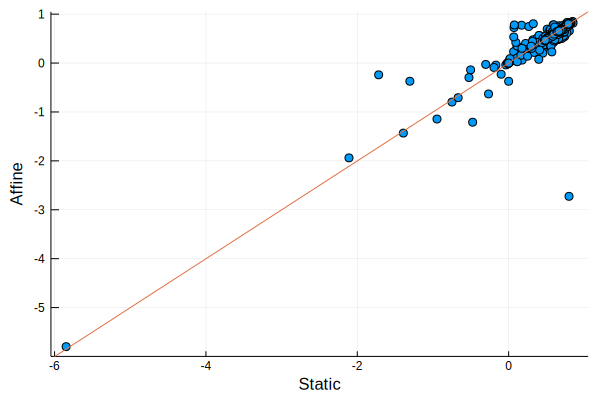

In [113]:
#Static vs. Affine
@df wide scatter(:Static, :Affine, legend=:none)
Plots.abline!(1,0)
xaxis!("Static")
yaxis!("Affine")

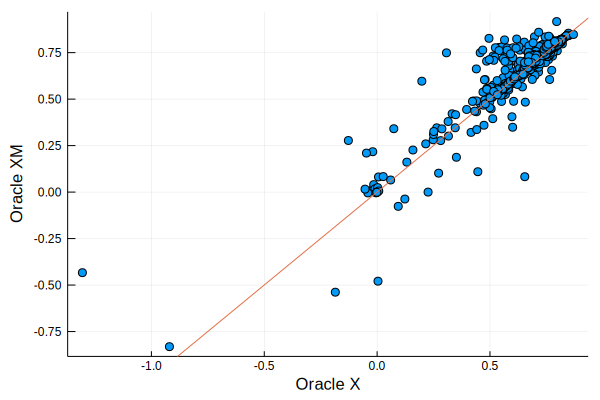

In [112]:
#Oracle vs. Oracle XM
scatter(wide[:,:Oracle], wide[:,Symbol("Oracle XM")], legend=:none)
Plots.abline!(1,0)
xaxis!("Oracle X")
yaxis!("Oracle XM")

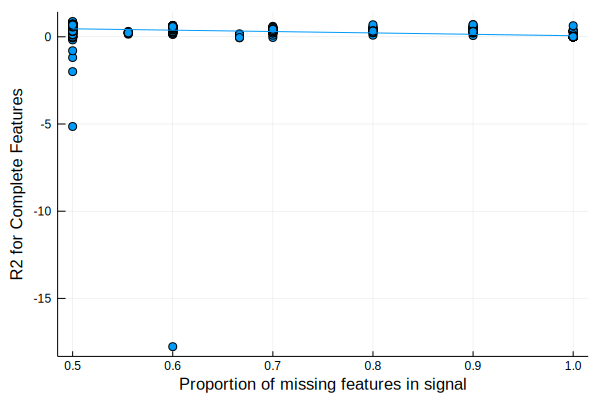

In [114]:
wide[!,:pMissing] = wide[:,:kMissing] ./ wide[:,:k]
wide[!,:osr2_baseline] =  wide[:,Symbol("Complete Features")] 
@df wide scatter(:pMissing, :osr2_baseline, smooth=true, legend=:none)
xaxis!("Proportion of missing features in signal",axis_lw=2)
yaxis!("R2 for Complete Features",axis_lw=2)

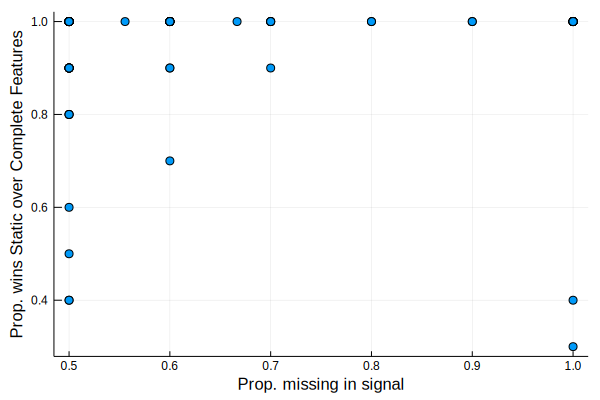

In [117]:
#Complete vs. Static
wide[!,:wins] = wide[:,Symbol("Complete Features")] .< wide[:,Symbol("Static")]
wide[!,:osr2] =  wide[:,Symbol("Complete Features")] 
aux = aggregate(wide[:,[:dataset, :k, :pMissing, :wins]],[:dataset, :k, :pMissing], mean)
@df aux scatter(:pMissing, :wins_mean, legend=:none)
xaxis!("Prop. missing in signal")
yaxis!("Prop. wins Static over Complete Features")

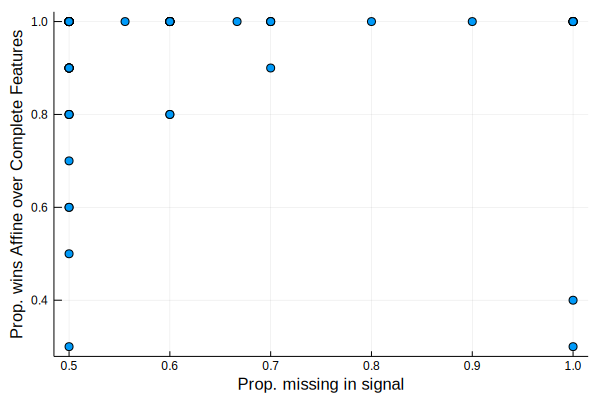

In [124]:
#Complete vs. Affine
wide[!,:wins] = wide[:,Symbol("Complete Features")] .< wide[:,Symbol("Affine")]
wide[!,:osr2] =  wide[:,Symbol("Complete Features")] 
aux = aggregate(wide[:,[:dataset, :k, :kMissing, :pMissing, :wins]],[:dataset, :k, :kMissing, :pMissing], mean)
@df aux scatter(:pMissing, :wins_mean, legend=:none)
xaxis!("Prop. missing in signal")
yaxis!("Prop. wins Affine over Complete Features")

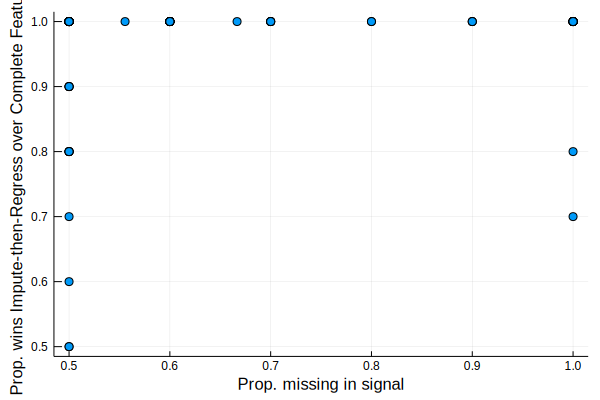

In [128]:
#Complete vs. Imp-then-Reg
wide[!,:wins] = wide[:,Symbol("Complete Features")] .< wide[:,Symbol("Imp-then-Reg 4")]
wide[!,:osr2] =  wide[:,Symbol("Complete Features")] 
aux = aggregate(wide[:,[:dataset, :k, :kMissing, :pMissing, :wins]],[:dataset, :k, :kMissing, :pMissing], mean)
@df aux scatter(:pMissing, :wins_mean, legend=:none)
xaxis!("Prop. missing in signal")
yaxis!("Prop. wins Impute-then-Regress over Complete Features")

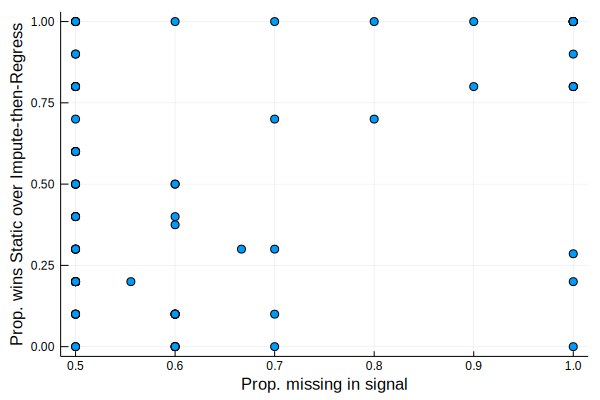

In [127]:
#Impute-the-Regress vs. Affine
wide[!,:wins] = wide[:,Symbol("Imp-then-Reg 4")] .<= wide[:,Symbol("Static")]
wide[!,:osr2] =  wide[:,Symbol("Complete Features")] 
aux = aggregate(wide[:,[:dataset, :k, :kMissing, :pMissing, :wins]],[:dataset, :k, :kMissing, :pMissing], mean)
@df aux scatter(:pMissing, :wins_mean, legend=:none)
xaxis!("Prop. missing in signal")
yaxis!("Prop. wins Static over Impute-then-Regress")

### Second analysis

In [24]:
results = aggregate(res[:,[:dataset, :k, :kMissing, :pMissing, :splitnum, :method_cat, :osr2]], [:dataset, :k, :kMissing, :pMissing, :splitnum, :method_cat], maximum)
rename!(results, :osr2_maximum => :osr2)
results = aggregate(results, [:dataset,:k,:pMissing,:kMissing,:method_cat], [mean,std])
select!(results, Not([:splitnum_mean, :splitnum_std]))

,dataset,k,pMissing,kMissing,method_cat,osr2_mean,osr2_std
,String,Int64,Float64,Int64,String,Float64,Float64
1,COUNT-loomis,10,0.0,0,Oracle X,0.743267,0.0578491
2,COUNT-loomis,10,0.0,0,Oracle XM,0.743023,0.0575377
3,COUNT-loomis,10,0.0,0,Complete Features,0.743422,0.0575379
4,COUNT-loomis,10,0.0,0,Imp-then-Reg,0.744358,0.0578371
5,COUNT-loomis,10,0.0,0,Static,0.743607,0.0577199
6,COUNT-loomis,10,0.0,0,Affine,0.743518,0.0573974
7,Ecdat-MCAS,10,0.0,0,Oracle X,0.634912,0.114243
8,Ecdat-MCAS,10,0.0,0,Oracle XM,0.623179,0.114349
9,Ecdat-MCAS,10,0.0,0,Complete Features,0.628744,0.144485


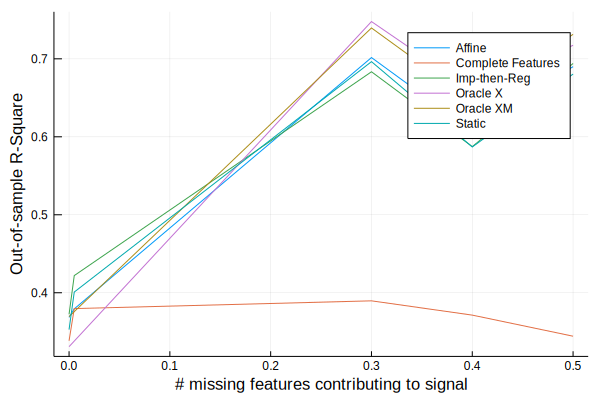

In [29]:
dset_list = unique(results[:,:dataset])
aux = deepcopy(results)
filter!(t->t[:dataset] == dset_list[10], aux)
sort!(aux, :pMissing)
@df aux plot(:pMissing, :osr2_mean, group=:method_cat, legend=:topright)
xaxis!("# missing features contributing to signal")
yaxis!("Out-of-sample R-Square")